# Setting Up & Loading Data Frame

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("fct_invoice.csv")

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
df["total"] = df["quantity"] * df["price"]

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [5]:
json_df = pd.read_json("dim_customer.json")

json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


<h1>Easy Questions<h1>

In [ ]:
# QUESTION ONE: How many unique customers are in the dataset?

In [8]:
u_c = df['customer_id'].nunique()

print(u_c)

5191


In [ ]:
# QUESTION TWO PART ONE: What are the different categories of products available?
# QUESTION TWO PART TWO: How many unique categories are there?

In [10]:
c = df['category'].unique()
cc = df['category'].nunique()

print(c)
print(cc)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [ ]:
# QUESTION THREE PART ONE: Which payment method is the most popular?
# QUESTION THREE PART TWO: How many times was it used?

In [11]:
pm_count = df.groupby('payment_method').size()

pm2 = max(list(pm_count))
pm1 = pm_count[pm_count==pm2].index[0]

print(pm1)
print(pm2)

Cash
44447


<h1> Medium Questions <h1>

In [ ]:
# QUESTION ONE: What are the three most popular categories, by total sales?

In [12]:
df['sales'] = df['quantity']*df['price']
group_cat = df.groupby('category')['sales'].sum()

pop = []
for i in range(3):
    pop.append(group_cat.sort_values(ascending=False)[0:3].index[i])

print(pop)

['Clothing', 'Shoes', 'Technology']


In [14]:
df['sales'] = df['quantity']*df['price']
group_cat = df.groupby('category')['sales'].sum()

ps = group_cat.sort_values(ascending=False)[0:3]

print('Total sales for the top 3 most popular category')
print(ps)

Total sales for the top 3 most popular category
category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [ ]:
# QUESTION TWO: What are the total sales attributed to customers over the age of 45?

In [15]:
df['sales'] = df['quantity']*df['price']

joint = df.merge(json_df, how='outer', left_on='customer_id', right_on='id')

tdf = joint.loc[joint['age'] >45, 'sales'].sum()

print(tdf)

82039768.15


In [ ]:
# QUESTION THREE: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this)

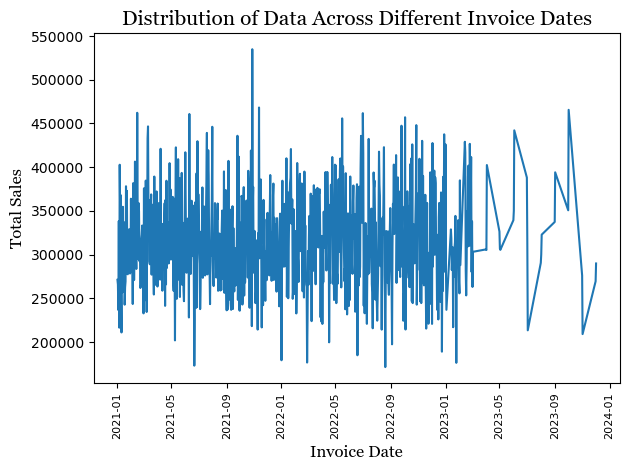

In [22]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

joint = df.merge(json_df, how="outer", left_on="customer_id", right_on="id")

grouped_data = joint.groupby("invoice_date")["sales"].sum()

plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel("Invoice Date", fontdict = {'fontname': 'Georgia', 'fontsize': 12})
plt.ylabel("Total Sales", fontdict = {'fontname': 'Georgia', 'fontsize': 12})
plt.title("Distribution of Data Across Different Invoice Dates", fontdict = {'fontname': 'Georgia', 'fontsize': 15})
plt.xticks(rotation = 'vertical', size = 8)
plt.tight_layout()
plt.show()

In [27]:
# QUESTION THREE: Insights

# As we can observe in the graph, there are numerous fluctuations in the trend line. 
# Particularly, during the months leading up to december, we can see that sales are at their peak.
# This could be due to the celebration of numerous upcoming holidays such as Christmas, New Years, and Hanukkah. 
# Hence, this would entice numerous customers to purchase gifts for their loved ones to better celebrate these special times.

In [ ]:
# HARD

In [ ]:
# QUESTION ONE: Create a pivot table showing the breakdown of sales across these dimensions in this order: category, decade age range (e.g., 10-19, 20-29, and so forth)

In [26]:
bins = range(0,101,10)

joint["age_group"] = pd.cut(x=joint["age"], bins=bins, right=False, include_lowest=True)

age_group = joint.groupby("age_group")["age"]

pivot_table = joint.groupby("category").first().reset_index()
pivot_table = pd.pivot_table(joint, values="sales", index="category", columns="age_group", aggfunc=np.sum)

print(pivot_table)

age_group        [0, 10)    [10, 20)     [20, 30)     [30, 40)     [40, 50)  \
category                                                                      
Books                0.0    12801.75     79461.75     84143.10     87203.40   
Clothing             0.0  1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics            0.0   109619.36    605915.32    723544.70    665034.96   
Food & Beverage      0.0    13582.31     73491.96     87246.86     89553.29   
Shoes                0.0   993281.35   5924878.24   7200839.66   7025590.02   
Souvenir             0.0    12375.15     54943.32     64092.72     66391.80   
Technology           0.0  1129800.00   5261550.00   6159300.00   5954550.00   
Toys                 0.0    60426.24    385100.80    420582.40    390906.88   

age_group           [50, 60)     [60, 70)    [70, 80)    [80, 90)  [90, 100)  
category                                                                      
Books               74962.20     80476.80    54827.